# PRZYGOTOWANIE DANYCH DO PRACY

Tutaj merguję tabelę brickeconomy_prices (z timeseries z cenami poszczególnych zestawów) oraz brickset_prices 
(z pozostałymi informacjami o zestawach). Brickonomy_prices przygotowałam w poprzednim notatniku, a brickset_info
stworzyłam w Execelu w Power Query. Brickset_prices wstępnie oczyściłam i przygotowałam dodatkowe kolumny w Excelu.

In [17]:
#Importuję biblioteki

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Importuję tabelę z cenami BRICKONOMY i info BRICKSET

prices = pd.read_csv('./data/Brickonomy_Prices_25_06_2024.csv')
info = pd.read_csv('./data/Brickset_info_26_06_2024.csv', delimiter=";")

#To późniejsza tabela, z wynikami K-MEANS z notanika 04_Lego - Klastrowanie po zwrotach - K-MEANS 
labels = pd.read_csv('./data/labels.csv', delimiter=",")

In [4]:
#Usuwam zbędne tabele "Name" powstałe podczas merge

merged_df = pd.merge(prices, info, on='Set_no', how='left')
merged_df.head(1)
merged_df = merged_df.drop(columns=['Name_y'])
merged_df = merged_df.rename(columns={'Name_x':'Name'})

In [5]:
merged_df

,Set_no,Name,Date,Min,Q1,Q3,Max,Type,Theme_group,Theme,...,Pieces,Minifigs_all,Minifigs_unique,Designer,RRP_dolar,Age_range_min,Age_range_max,Packaging,Weight_kg,Availability
0,800-2,Extra Bricks Red,2009-01-01,9.86,10.23,11.35,12.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,800-2,Extra Bricks Red,2009-02-01,9.47,10.00,11.57,12.63,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800-2,Extra Bricks Red,2009-03-01,9.32,9.67,10.73,11.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800-2,Extra Bricks Red,2009-04-01,9.51,10.04,11.62,12.68,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,800-2,Extra Bricks Red,2009-05-01,9.94,10.32,11.44,12.19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028600,45810-1,Boomtown Build,2023-10-01,58.51,61.76,71.51,78.02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028601,45810-1,Boomtown Build,2023-11-01,57.55,59.71,66.21,70.54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028602,45810-1,Boomtown Build,2023-12-01,57.08,60.26,69.77,76.11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028603,45810-1,Boomtown Build,2024-01-01,50.68,52.59,58.31,62.12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
#Poprawiam wszystkie 'tba' na bieżąca datę, żeby móc spokojnie wyliczyć czas obecności zestawu na rynku pierwotnym 

merged_df['Exit'] = merged_df['Exit'].apply(lambda x: datetime.today() if x == '- {t.b.a}' else pd.to_datetime(x))

# tba_rows['Date'].unique()
# około 171 pozycji miało TBA

In [159]:
#Sprawdzam czy poszło dobrze

merged_df.dtypes

Set_no                     object
Name                       object
Date               datetime64[ns]
Min                       float64
Q1                        float64
Q3                        float64
Max                       float64
Type                       object
Theme_group                object
Theme                      object
Year_released             float64
Launch             datetime64[ns]
Exit               datetime64[ns]
Pieces                    float64
Minifigs_all              float64
Minifigs_unique           float64
Designer                   object
RRP_dolar                  object
Age_range_min             float64
Age_range_max             float64
Packaging                  object
Weight_kg                  object
Availability               object
Time_in_shops             float64
Pieces_bins                object
IQR                       float64
Midhinge                  float64
dtype: object

In [147]:
# Poprawiam dattime kolumn 'Launch' i 'Exit' na YY-DD-MM

merged_df['Launch'] = pd.to_datetime(merged_df['Launch'])
merged_df['Exit'] = pd.to_datetime(merged_df['Exit'])

merged_df['Launch'] = merged_df['Launch'].dt.strftime('%Y-%m-%d')
merged_df['Launch'].unique()

merged_df['Exit'] = merged_df['Exit'].dt.strftime('%Y-%m-%d')
merged_df['Exit'].unique()

merged_df['Launch'] = pd.to_datetime(merged_df['Launch'])
merged_df['Exit'] = pd.to_datetime(merged_df['Exit'])

In [175]:
# Zamieniam date "Year_released" na string (kategoria)

for i in range(len(merged_df['Year_released'])):
    if merged_df.loc[i, 'Year_released'] == 0 or pd.isnull(merged_df.loc[i, 'Year_released']):
        continue
    else:
        print(i)
        merged_df.loc[i, 'Year_released'] = int((merged_df.loc[i, 'Year_released']))

0


ValueError: invalid literal for int() with base 10: 'nan'

In [149]:
#Dodaję kolumnę "Time in shops" wskazującą jak długo obiekt był w sprzedaży (i być może w produkcji)
merged_df['Time_in_shops'] = (merged_df['Exit'] - merged_df['Launch']).dt.days / 365.25

In [150]:
# Dodaję kolumnę 'Pieces_bin', żeby łatwiej grupować zestawy po ilości zawartych części

def assign_bins(value):
    if pd.isna(value) or value == 0:
        return '0'
    elif value == 1:
        return '1'
    elif 2 <= value <= 5:
        return '2-5'
    elif 5 < value <= 15:
        return '5-15'
    elif 15 < value <= 50:
        return '15-50'
    elif 50 < value <= 100:
        return '50-100'
    elif 100 < value <= 500:
        return '100-500'
    elif 500 < value <= 1000:
        return '500-1000'
    elif 1000 < value <= 5000:
        return '1000-5000'
    elif 5000 < value <= 10000:
        return '5000-10000'
    else:
        return 'Over 10000'

# Tworzenie nowej kolumny 'Pieces_bins'
merged_df['Pieces_bins'] = merged_df['Pieces'].apply(assign_bins)

In [8]:
# Dodaję kolumnę 'Midhinge' i "IQR - żeby ułatwić sobie liczenie uśrednionej ceny zestawu

merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['IQR'] = merged_df['Q3'] - merged_df['Q1']
merged_df['Midhinge'] = 0.5*(merged_df['Q3'] + merged_df['Q1'])
merged_df = merged_df[merged_df['Date'] < merged_df['Date'].max()]
prices = merged_df[['Date','Midhinge']]

# WŁAŚCIWA ANALIZA

    Month  Average_Price  Normalized_Average_Price
0       1      73.860239                  0.205875
1       2      74.557052                  0.340553
2       3      73.284710                  0.094639
3       4      75.067584                  0.439226
4       5      74.904384                  0.407684
5       6      72.905003                  0.021250
6       7      73.234270                  0.084890
7       8      73.773145                  0.189042
8       9      72.795055                  0.000000
9      10      74.288013                  0.288554
10     11      75.972722                  0.614168
11     12      77.968989                  1.000000


C:\Users\miejs\AppData\Local\Temp\ipykernel_42340\3162296589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Month'] = prices['Date'].dt.month
C:\Users\miejs\AppData\Local\Temp\ipykernel_42340\3162296589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Year'] = prices['Date'].dt.year


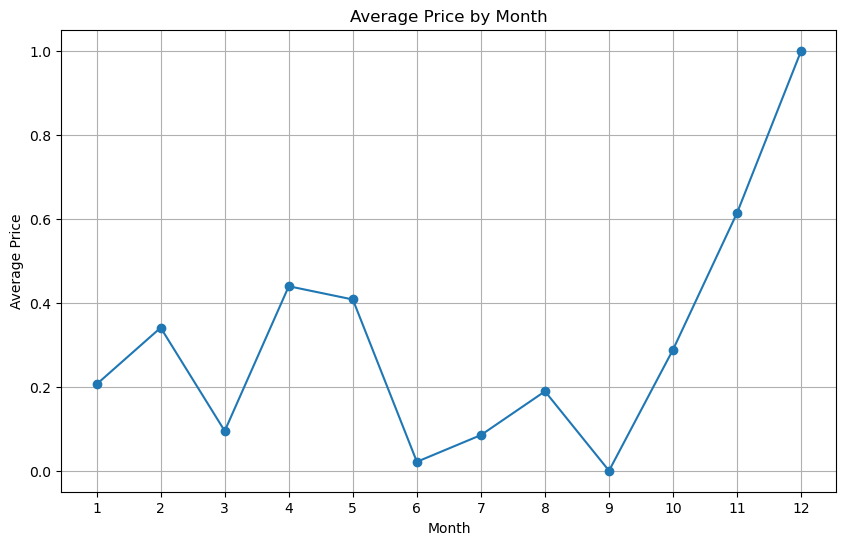

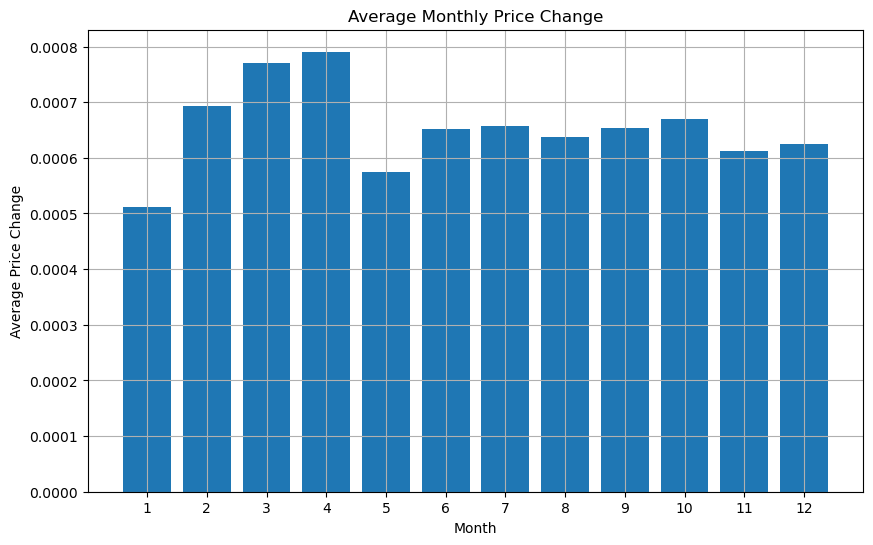

In [152]:
# Patrzę czy jest jakaś różnica w średnich cenach na przestrzeni lat w poszczególnych miesiącach i jaka jest różnica
# w zmianach cen z miesiąca na miesiąc

prices['Month'] = prices['Date'].dt.month
prices['Year'] = prices['Date'].dt.year

monthly_avg = prices.groupby('Month')['Midhinge'].mean().reset_index()
monthly_avg.columns = ['Month', 'Average_Price']
min_value = monthly_avg['Average_Price'].min()
max_value = monthly_avg['Average_Price'].max()

# Normalizacja wartości do zakresu od 0 do 1
monthly_avg['Normalized_Average_Price'] = (monthly_avg['Average_Price'] - min_value) / (max_value - min_value)

# Wyświetlenie średnich cen miesięcznych
print(monthly_avg)

# Wykres średnich cen miesięcznych
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'], monthly_avg['Normalized_Average_Price'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

# Analiza wzorców wzrostu i spadku cen w poszczególnych miesiącach
price_changes = prices.groupby('Month')['Midhinge'].apply(lambda x: x.diff().dropna())
monthly_changes = price_changes.reset_index().groupby('Month')['Midhinge'].mean().reset_index()
monthly_changes.columns = ['Month', 'Average_Change']

# Wykres średnich zmian cen miesięcznych
plt.figure(figsize=(10, 6))
plt.bar(monthly_changes['Month'], monthly_changes['Average_Change'])
plt.xlabel('Month')
plt.ylabel('Average Price Change')
plt.title('Average Monthly Price Change')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

In [153]:
#Po agregacji 'po chłopsku' index zmiany jest mało imponujący. Potrzebne są bardziej rozbudowane modele do dalszej analizy
monthly_changes['Average_Change']


0     0.000511
1     0.000693
2     0.000771
3     0.000791
4     0.000574
5     0.000652
6     0.000658
7     0.000637
8     0.000654
9     0.000670
10    0.000613
11    0.000625
Name: Average_Change, dtype: float64

In [154]:
# Sprawdzam czy istnieje zależność między ilością części za ceną zestawu Lego
# Okazuje się, że jest pewna korelacja, i to istotna statystycznie!

from scipy.stats import pearsonr

# Przykładowe dane

pieces_price_grouped = merged_df[['Set_no','Pieces','Midhinge']]
pieces_price_grouped = pieces_price_grouped.dropna()
pieces_price_grouped2 = pieces_price_grouped.groupby(['Set_no', 'Pieces'])['Midhinge'].mean().reset_index()
pieces_price_grouped2 = pieces_price_grouped2[pieces_price_grouped2['Pieces'] < 4000]

# # Obliczenie korelacji Pearsona i p-wartości
pearson_corr, p_value = pearsonr(pieces_price_grouped2['Pieces'], pieces_price_grouped2['Midhinge'])

print(f'Pearson correlation coefficient: {pearson_corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretacja p-wartości
alpha = 0.05  # Poziom istotności
if p_value < alpha:
    print('Korelacja jest istotna statystycznie.')
else:
    print('Nie ma istotnej statystycznie korelacji.')

Pearson correlation coefficient: 0.64
P-value: 0.0000
Korelacja jest istotna statystycznie.


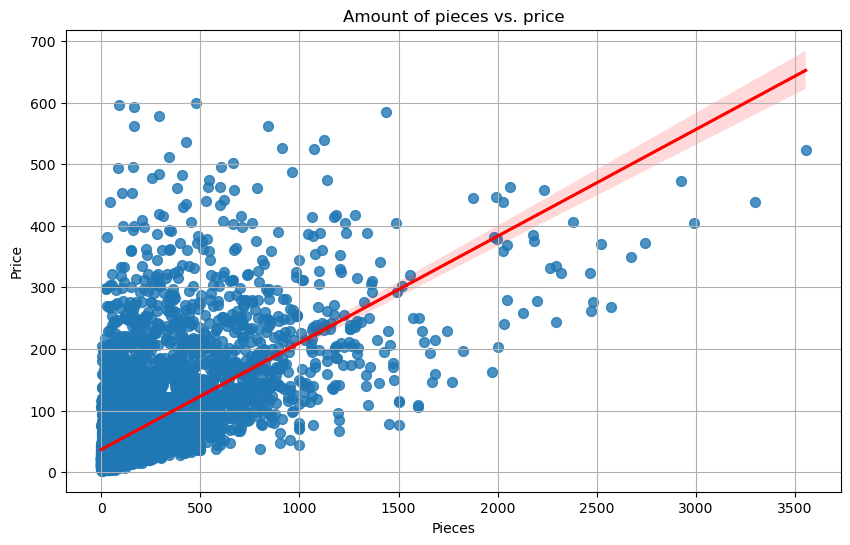

In [32]:
# Tworzę scatterplot pokazujący zależność między ilością części, a ceną wraz z trendem

plt.figure(figsize=(10, 6))
sns.regplot(x='Pieces', y='Midhinge', data=pieces_price_grouped2, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Pieces')
plt.ylabel('Price')
plt.title('Amount of pieces vs. price')
plt.grid(True)
plt.show()

In [34]:
# Patrzę jak się rozkłada się cena za 1 część w zależności od tematyki zestawu 

average_price_per_piece = merged_df.groupby('Theme').apply(lambda x: x['Midhinge'].sum() / x['Pieces'].sum()).reset_index(name='Price_per_piece')
average_price_per_piece

# 5 najdroższych zestawów
top_expensive_sets = average_price_per_piece.nlargest(5, 'Price_per_piece')

# 5 najtańszych zestawów
top_cheap_sets = average_price_per_piece.nsmallest(5, 'Price_per_piece')

# Łączenie wyników w jedną zmienną
top_sets = pd.concat([top_expensive_sets, top_cheap_sets], ignore_index=True)

top_sets

,Theme,Price_per_piece
0,Power Functions,12.037820
1,Scooby-Doo,8.399620
2,Baby,6.630095
3,Fabuland,6.421644
4,Action Wheelers,5.208801
5,Make and Create,0.094944
6,DC Super Hero Girls,0.109256
7,Classic,0.114800
8,Hidden Side,0.117773
9,Bricks and More,0.124103


In [78]:
# Tworzę tabelę ze średnim czasem na półce na rynku pierwotnym

non_nan_rows = merged_df.loc[merged_df['Time_in_shops'].notna()]
# sorted(non_nan_rows['Time_in_shops'].unique())
rows = non_nan_rows[['Time_in_shops','Set_no']]
nd_rows = rows.drop_duplicates()

#Tutaj są dwa brzydkie outliery, więc je usuwam
nd_rows = nd_rows[nd_rows['Time_in_shops'] <7]
nd_rows

,Time_in_shops,Set_no
145659,1.998631,1815-1
145845,5.834360,1817-1
149751,2.581793,4559-1
155889,2.997947,5820-1
156075,2.414784,5835-1
...,...,...
1019082,1.275838,70842-1
1019144,0.416153,70847-1
1019202,0.416153,70848-1
1019260,0.416153,70849-1


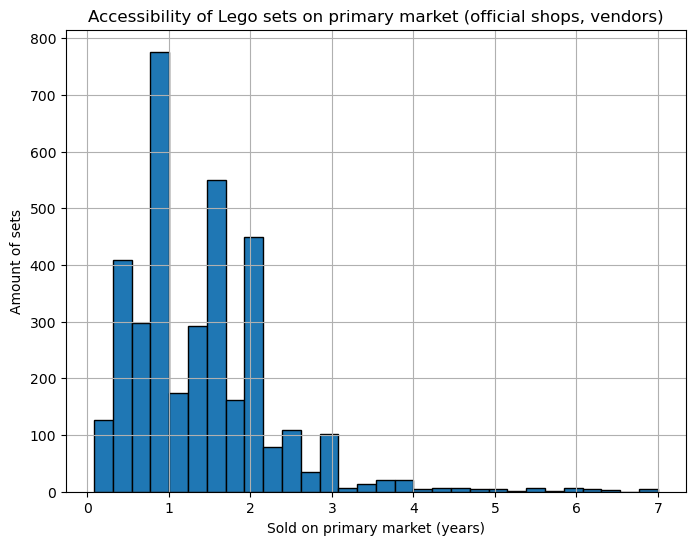

Amount of bin 0.08-0.31: 126, Percent of data: 3.4%
Amount of bin 0.31-0.54: 409, Percent of data: 11.1%
Amount of bin 0.54-0.77: 298, Percent of data: 8.1%
Amount of bin 0.77-1.00: 776, Percent of data: 21.1%
Amount of bin 1.00-1.23: 174, Percent of data: 4.7%
Amount of bin 1.23-1.47: 293, Percent of data: 8.0%
Amount of bin 1.47-1.70: 550, Percent of data: 15.0%
Amount of bin 1.70-1.93: 161, Percent of data: 4.4%
Amount of bin 1.93-2.16: 450, Percent of data: 12.2%
Amount of bin 2.16-2.39: 79, Percent of data: 2.1%
Amount of bin 2.39-2.62: 109, Percent of data: 3.0%
Amount of bin 2.62-2.85: 34, Percent of data: 0.9%
Amount of bin 2.85-3.08: 102, Percent of data: 2.8%
Amount of bin 3.08-3.31: 6, Percent of data: 0.2%
Amount of bin 3.31-3.54: 14, Percent of data: 0.4%
Amount of bin 3.54-3.77: 20, Percent of data: 0.5%
Amount of bin 3.77-4.00: 20, Percent of data: 0.5%
Amount of bin 4.00-4.23: 5, Percent of data: 0.1%
Amount of bin 4.23-4.46: 6, Percent of data: 0.2%
Amount of bin 4.46-

In [90]:
#Sprawdzam za pomocą histogramu jak się rozkłada długość obecności zestawu LEGO na rynku pierwotnym, zanim trafi na rynek wtórny

from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(8, 6))

bins=30
plt.hist(nd_rows['Time_in_shops'], bins=bins, edgecolor='black', density=False)

plt.xlabel('Sold on primary market (years)')
plt.ylabel('Amount of sets')
plt.title('Accessibility of Lego sets on primary market (official shops, vendors)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.show()

hist, bins = np.histogram(nd_rows['Time_in_shops'], bins=bins)
total_samples = len(nd_rows)

for i in range(len(hist)):
    bin_range = f'{bins[i]:.2f}-{bins[i+1]:.2f}'
    value = hist[i]
    percent_of_data = value / total_samples * 100
    print(f"Amount of bin {bin_range}: {value}, Percent of data: {percent_of_data:.1f}%")   
   

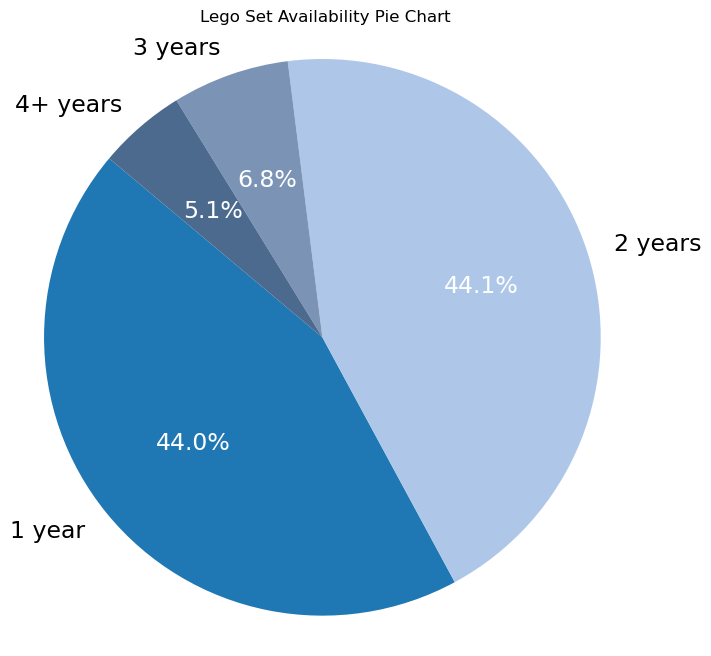

In [91]:
# Robię Piechart do wizualizacji 

labels = ['1 year', '2 years', '3 years', '4+ years']
sizes = [44.0, 44.1, 6.8, 100 - (44.0 + 44.1 + 6.8)] 
colors = ['#1f77b4', '#aec7e8', '#7b94b5', '#4b6a8d']

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

for text in texts:
    text.set_color('black')
    text.set_fontsize('17')  

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize('17')  
plt.title('Lego Set Availability Pie Chart', color='black') 
plt.axis('equal')
plt.show()


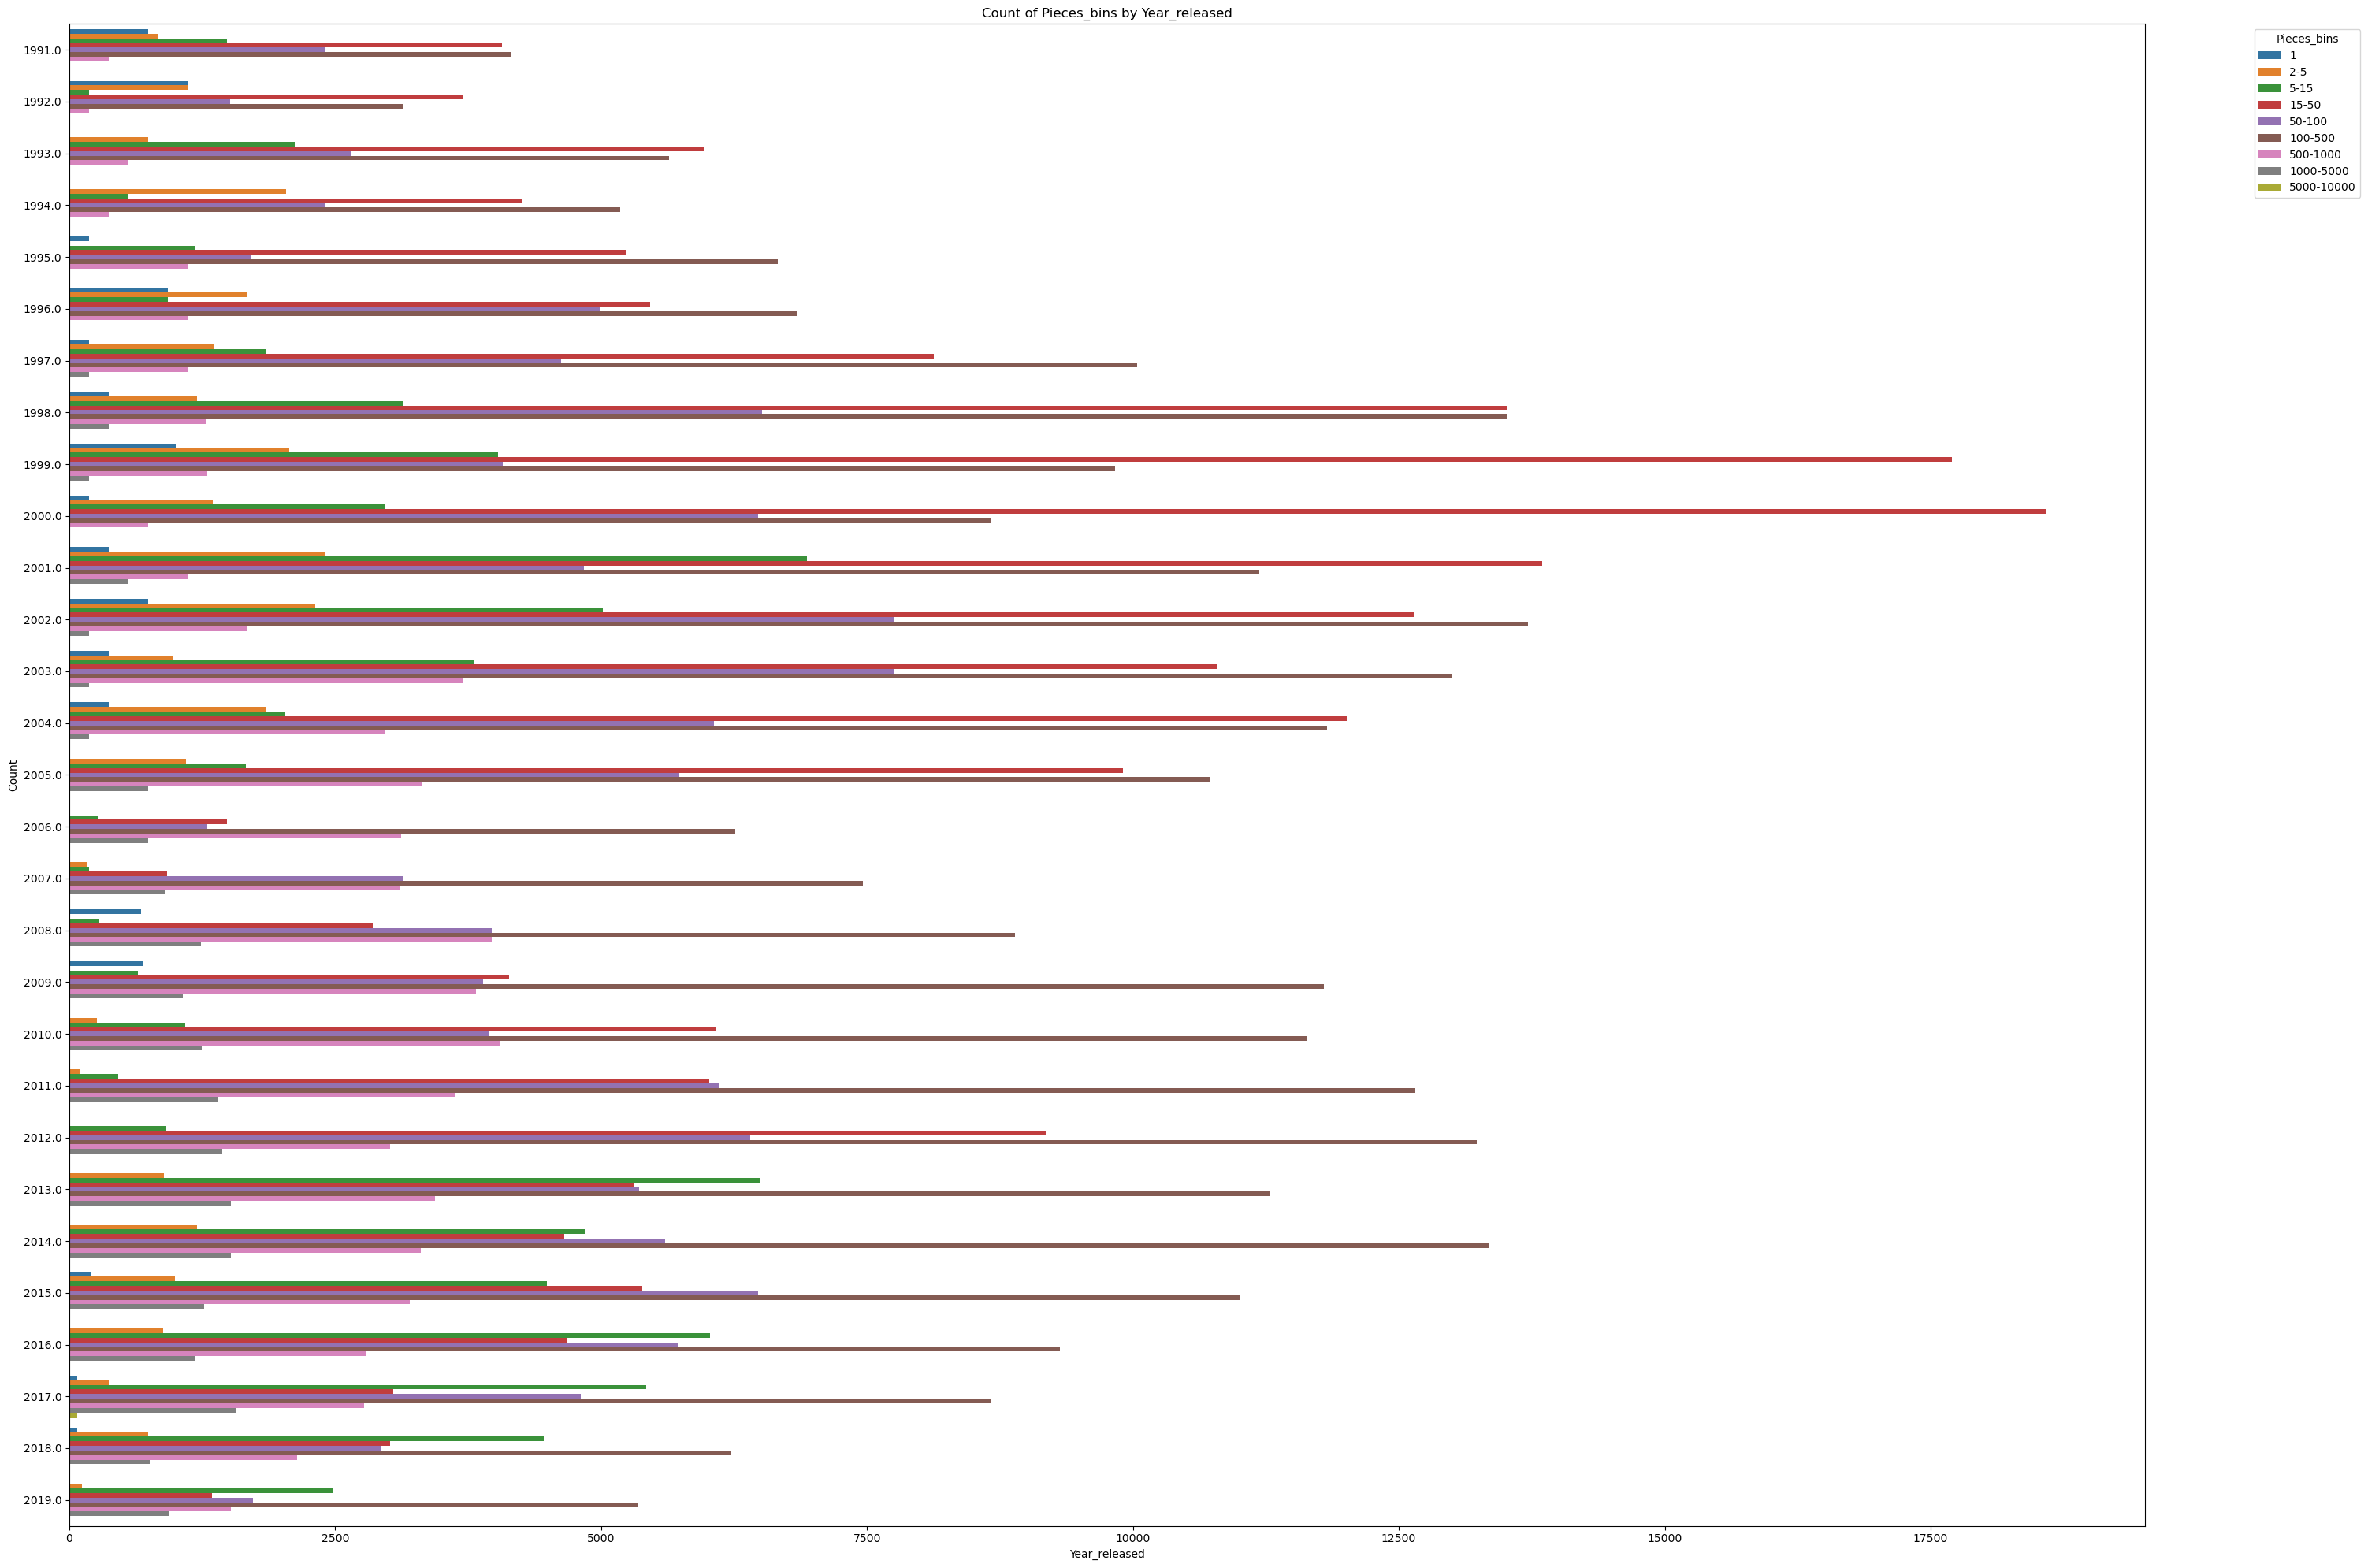

In [92]:
# Badam liczbę klocków lego w setach w poszczególnyh latach
# Brzydki wykres, ale widać różnicę dwóch słupków na przestrzeni lat.

grouped = merged_df.groupby(['Year_released', 'Pieces_bins']).size().reset_index(name='Count')
grouped = grouped[grouped['Year_released'] > 1990]

custom_order = ['1','2-5', '5-15','15-50', '50-100','100-500','500-1000','1000-5000','5000-10000']
grouped['Pieces_bins'] = pd.Categorical(grouped['Pieces_bins'], categories=custom_order, ordered=True)

plt.figure(figsize=(30, 20))
sns.barplot(data=grouped, y='Year_released', x='Count', hue='Pieces_bins', orient='h')

plt.title('Count of Pieces_bins by Year_released')
plt.xlabel('Year_released')
plt.ylabel('Count')
plt.legend(title='Pieces_bins', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


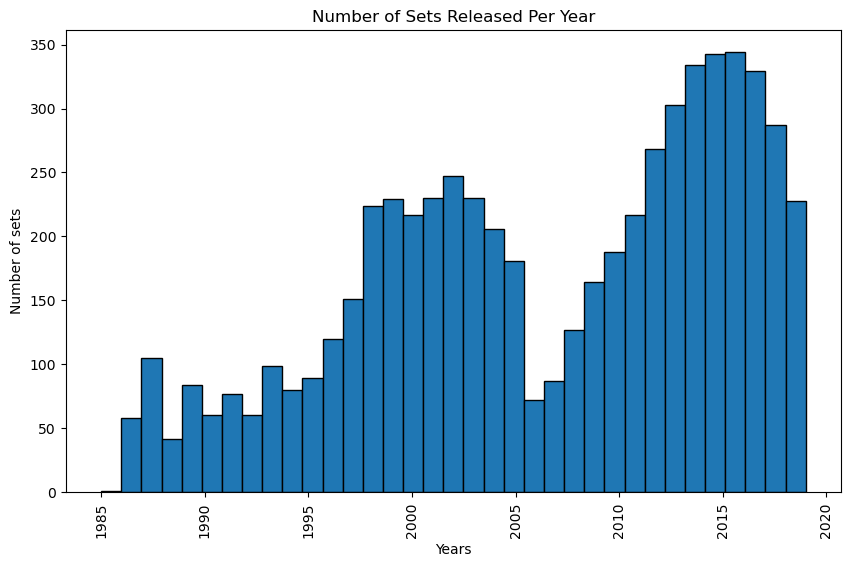

,Year_released,Set_no
0,NaN,800-2
186,NaN,801-2
372,NaN,802-2
558,NaN,803-1
744,NaN,804-1
...,...,...
1028331,NaN,Hot Shot Carnival
1028391,NaN,Vintage Roadster
1028449,NaN,Bikes!
1028506,NaN,Steampunk Mini Chess


In [194]:
# Ilość zestawów w każdym roku

setsyear = merged_df[['Year_released','Set_no']]
setsyear = setsyear.drop_duplicates()
setsyear['Year_released'] = setsyear['Year_released'].replace('nan', np.nan)
# setsyear = setsyear.dropna()

# min_year = setsyear['Year_released'].min()
# max_year = setsyear['Year_released'].max()

# Utworzenie histogramu z jednym kubełkiem na rok
plt.figure(figsize=(10, 6))
plt.hist(yt, bins=35, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Number of sets')
plt.title('Number of Sets Released Per Year')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

### Badam trendy zwrotu inwestycji z zestawów pod kątem roku wydania i tematyki

In [30]:
price_by_set_df = pd.pivot_table(merged_df, index='Date', columns='Set_no', values='Midhinge')

In [32]:
annualized_rets = []
for set_no in price_by_set_df.columns:
    set_price_srs = price_by_set_df[set_no]
    first_ts = set_price_srs.first_valid_index()
    last_ts = set_price_srs.last_valid_index()
    days_elapsed = (last_ts - first_ts).days
    if days_elapsed > 0:
        set_ret = (set_price_srs[last_ts] - set_price_srs[first_ts])/set_price_srs[first_ts]
        annualized_ret = 100*((1 + set_ret)**(365/days_elapsed) - 1)
        annualized_rets.append([set_no, first_ts, annualized_ret])
    else:
        continue

In [33]:
annualized_set_rets_df = pd.DataFrame(annualized_rets, columns=["Set_no", "First available", "Annualized return (% pa)"]).sort_values(ascending=False, by="Annualized return (% pa)")
annualized_set_rets_df

,Set_no,First available,Annualized return (% pa)
1004,2912-1,2024-01-01,207.541173
42,10056-1,2023-07-01,61.112733
4452,66591-1,2018-12-01,57.053904
583,1625-1,2023-12-01,52.223010
5499,71025-3,2019-10-01,49.513117
...,...,...,...
661,1959-1,2020-03-01,-4.684721
481,1191-1,2022-02-01,-4.886329
2738,4216-1,2023-11-01,-7.057113
572,1549-1,2022-01-01,-11.287379


In [44]:
full_df = annualized_set_rets_df.merge(info, on='Set_no', how='left')

In [42]:
pd.options.display.float_format = "{:,.2f}".format

In [45]:
full_df = full_df.dropna(subset='Name').astype({"Year_released": "int64"})

In [46]:
full_df

,Set_no,First available,Annualized return (% pa),Name,Type,Theme_group,Theme,Year_released,Launch,Exit,Pieces,Minifigs_all,Minifigs_unique,Designer,RRP_dolar,Age_range_min,Age_range_max,Packaging,Weight_kg,Availability
0,2912-1,2024-01-01,207.54,Radical Racer,Normal,Pre-school,Action Wheelers,2000,NaN,NaN,16.00,1.00,1.00,NaN,"20,00",NaN,NaN,NaN,NaN,NaN
1,10056-1,2023-07-01,61.11,White Plates,Normal,Basic,Bulk Bricks,2002,NaN,NaN,56.00,NaN,NaN,NaN,"5,00",NaN,NaN,Polybag,NaN,LEGO exclusive
2,66591-1,2018-12-01,57.05,2-in-1 Value Pack: Han Solo & Chewbacca,Collection,Licensed,BrickHeadz,2018,NaN,NaN,290.00,NaN,NaN,NaN,NaN,NaN,NaN,Box,NaN,Retail
3,1625-1,2023-12-01,52.22,Snowman,Normal,Basic,Basic,1989,NaN,NaN,40.00,NaN,NaN,NaN,"1,30",NaN,NaN,Polybag,NaN,NaN
4,71025-3,2019-10-01,49.51,Fright Knight,Normal,Miscellaneous,Collectable Minifigures,2019,NaN,NaN,9.00,1.00,NaN,NaN,"3,99",5.00,99.00,Foil pack,NaN,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7624,1959-1,2020-03-01,-4.68,Ultra-Light,Normal,Modern day,Town,1993,NaN,NaN,30.00,1.00,1.00,NaN,NaN,NaN,NaN,Box,NaN,Retail - limited
7625,1191-1,2022-02-01,-4.89,Try Bird,Normal,Modern day,Town,1999,NaN,NaN,34.00,1.00,1.00,NaN,NaN,NaN,NaN,Polybag,NaN,Promotional
7626,4216-1,2023-11-01,-7.06,Superset 100,Normal,Basic,Basic,1998,NaN,NaN,480.00,NaN,NaN,NaN,"30,00",NaN,NaN,NaN,NaN,NaN
7627,1549-1,2022-01-01,-11.29,Santa and Chimney,Normal,Basic,Basic,1992,NaN,NaN,62.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pd.options.display.float_format = "{:,.2f}".format

In [48]:
full_df.groupby(["Theme_group"]).agg({"Set_no": "count", "Annualized return (% pa)": ["mean", "std"]}).sort_values(("Annualized return (% pa)", "mean"), ascending=False)

Set_no Annualized return (% pa)      
                  count                     mean   std
Theme_group                                           
Constraction        278                    14.08  6.04
Licensed            779                    10.30  6.18
Action/Adventure    749                     9.46  5.55
Historical          311                     9.03  4.06
Pre-school          473                     7.72 11.19
Model making        383                     7.57  5.31
Junior              135                     7.19  4.96
Miscellaneous       993                     6.90  6.35
Modern day         1093                     6.18  3.85
Racing              141                     5.85  3.81
Vintage               1                     5.54   NaN
Technical           279                     5.04  4.09
Girls               155                     4.56  4.07
Basic               243                     4.49  5.78
Educational          66                     3.78  4.65

In [49]:
full_df.groupby(["Theme"]).agg({"Set_no": "count", "Annualized return (% pa)": ["mean", "std"]}).sort_values(("Annualized return (% pa)", "mean"), ascending=False)

Set_no Annualized return (% pa)      
                       count                     mean   std
Theme                                                      
Action Wheelers            8                    29.73 71.87
The Hobbit                 4                    17.95  2.89
HERO Factory              48                    17.66  5.29
The Lord of the Rings      9                    17.24  3.11
SpongeBob SquarePants     14                    17.22  4.34
...                      ...                      ...   ...
Baby                      15                     3.07  4.36
Dacta                     32                     2.38  2.51
Znap                      16                     1.88  3.17
Mindstorms                19                     1.54  2.91
Unikitty                   2                     1.39  3.64

[120 rows x 3 columns]

In [50]:
full_df.groupby([full_df['First available'].dt.year]).agg({"Set_no": "count", "Annualized return (% pa)": ["mean", "std"]}).sort_index(ascending=False)

Set_no Annualized return (% pa)      
                 count                     mean   std
First available                                      
2024                 4                    71.20 91.29
2023                12                    17.96 23.59
2022                21                     4.40 10.90
2021                19                     3.25  5.97
2020                39                     4.36  6.47
2019               204                     7.38  7.23
2018               332                     7.34  6.82
2017               323                     8.08  6.32
2016               790                     9.20  6.64
2015               366                    11.45  6.47
2014               248                    10.83  5.83
2013               194                    11.23  5.72
2012               280                    11.52  5.31
2011               179                    11.02  4.71
2010               153                    11.28  4.43
2009              2915                     5.70  3.80

### ANALIZA po K-MEANS z notatnika 04_Lego - Klastrowanie po zwrotach - K-MEANS 

In [9]:
import pandas as pd
prices_by_set_df = pd.pivot_table(merged_df, index='Date', columns='Set_no', values='Midhinge')

In [13]:
labeled_sets_df = labels
labeled_sets_df = labeled_sets_df.merge(merged_df, on="Set_no", how="left")

In [14]:
cluster0_df = labeled_sets_df[labeled_sets_df["Label"] == 0]
cluster0_by_set_df = pd.pivot_table(cluster0_df, index='Date', columns='Set_no', values='Midhinge')
cluster0_by_set_df

Set_no,1000-1,10004-1,10014-1,10016-1,10021-1,10023-1,10036-1,10037-1,10113-1,10128-1,...,9684-1,9725-1,9747-1,9748-1,9754-1,9785-1,9786-1,9794-1,9795-1,Gearbox Pack
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,160.535,43.665,50.970,77.255,120.075,81.675,91.140,85.880,70.675,120.445,...,217.640,134.500,214.435,136.790,175.940,193.175,192.715,217.660,183.435,48.110
2009-02-01,160.590,43.945,51.300,77.795,120.840,82.505,91.980,86.605,71.350,121.405,...,217.850,134.440,214.800,136.780,176.310,193.375,192.755,217.250,183.940,48.880
2009-03-01,151.970,41.810,48.815,74.060,114.975,78.765,87.740,82.560,68.070,115.680,...,206.275,127.140,206.215,129.390,167.120,183.115,182.390,207.880,174.445,46.900
2009-04-01,161.420,44.675,52.165,79.175,122.850,84.470,94.010,88.385,72.950,123.800,...,219.240,134.945,214.840,137.380,177.825,194.640,193.705,217.465,185.730,50.570
2009-05-01,162.230,45.160,52.730,80.065,124.165,85.670,95.265,89.510,73.935,125.315,...,220.475,135.520,214.590,138.020,179.025,195.750,194.660,218.105,187.095,51.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,226.475,111.790,159.550,199.505,292.025,312.135,299.075,356.470,141.405,294.060,...,341.600,170.435,219.535,192.690,234.980,307.835,281.490,235.245,330.690,205.500
2024-02-01,240.220,111.905,129.895,174.895,243.075,281.875,284.570,331.030,144.395,302.545,...,350.090,180.810,212.865,201.625,208.785,313.820,281.315,239.690,290.320,197.815
2024-03-01,236.555,105.980,143.755,200.785,241.670,360.250,228.430,313.040,148.810,288.230,...,344.830,203.025,219.610,240.615,251.845,296.995,266.005,235.730,348.945,206.315


In [15]:
cluster0_by_set_df.pct_change(periods=12).iloc[12:].mean().sort_values(ascending=False)

Set_no
5951-1    0.286333
6155-1    0.263508
5357-1    0.251406
8546-1    0.249472
8911-1    0.247198
            ...   
9725-1    0.009806
2669-1    0.006598
8250-1    0.005202
9794-1    0.004802
9747-1    0.002383
Length: 642, dtype: float64

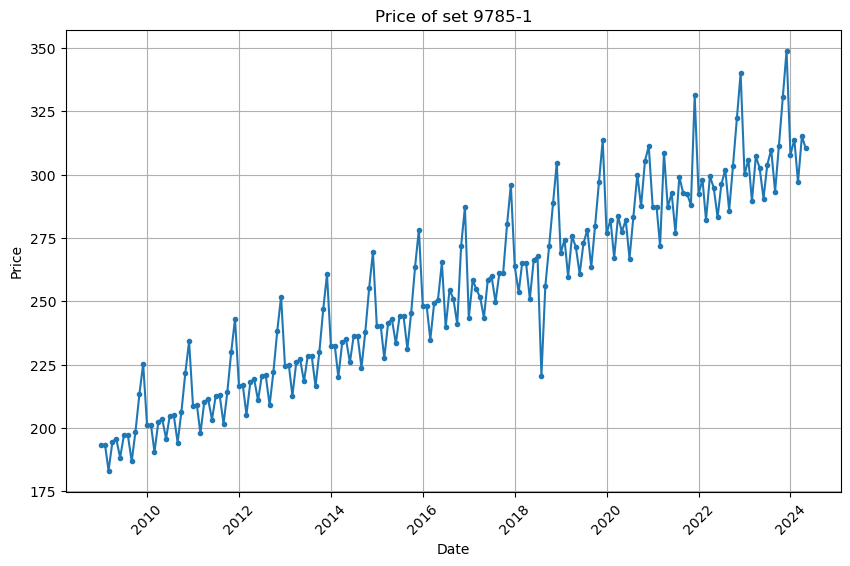

In [18]:
# High Yearly Yield - Low Yearly Risk
# set_no = "3409-2"
set_no = "9785-1"
plt.figure(figsize=(10, 6))
plt.plot(cluster0_by_set_df.index, cluster0_by_set_df[set_no], marker='.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price of set {set_no}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [19]:
cluster1_df = labeled_sets_df[labeled_sets_df["Label"] == 1]
cluster1_by_set_df = pd.pivot_table(cluster1_df, index='Date', columns='Set_no', values='Midhinge')
cluster1_by_set_df

Set_no,10000-1,10020-1,10025-1,10027-1,10041-1,10151-1,10152-1,10173-1,10183-1,10202-1,...,8849-1,8850-1,8855-1,8862-1,8877-1,8914-1,8923-1,9301-1,9453-1,9633-1
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,119.020,178.435,132.210,242.565,205.220,132.140,133.475,152.940,118.470,139.845,...,258.570,163.160,171.520,343.415,140.685,11.620,24.610,166.065,124.480,224.740
2009-02-01,119.925,180.075,133.335,245.105,207.255,133.950,134.445,157.375,120.165,141.570,...,258.785,163.350,171.620,343.830,141.525,11.905,25.570,167.045,124.555,225.285
2009-03-01,114.235,171.755,127.110,234.045,197.815,128.270,128.025,152.655,115.120,135.405,...,245.020,154.705,162.460,325.640,134.595,11.505,25.000,158.865,117.905,213.605
2009-04-01,122.200,184.005,136.090,251.050,212.075,138.005,136.910,166.500,123.925,145.495,...,260.390,164.465,172.610,346.190,143.755,12.505,27.490,169.665,125.275,227.365
2009-05-01,123.650,186.460,137.825,254.685,215.040,140.405,138.500,171.555,126.140,147.850,...,261.840,165.425,173.535,348.225,145.245,12.845,28.540,171.405,125.945,228.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,412.980,497.855,533.155,717.205,400.920,412.090,355.905,604.385,624.310,480.990,...,628.540,263.970,356.560,563.010,454.695,233.510,201.845,237.820,345.220,413.735
2024-02-01,477.485,445.755,443.760,601.900,501.945,352.860,330.175,642.850,553.680,511.335,...,667.370,269.110,305.310,593.775,475.760,196.410,206.350,249.230,295.600,461.250
2024-03-01,473.145,509.155,457.825,630.720,468.865,412.090,299.620,668.125,608.130,566.195,...,600.925,254.695,295.300,604.585,576.105,214.470,195.800,244.885,249.420,395.445


In [20]:
cluster1_by_set_df.pct_change(periods=12).iloc[12:].mean().sort_values(ascending=True)

Set_no
6802-1       0.010163
6060-1       0.015269
6375-1       0.018203
3675-1       0.022602
6419-1       0.029141
               ...   
4524-1       0.248015
1695-1       0.249666
4186875-1    0.274859
8914-1       0.277067
3347-1       0.359553
Length: 265, dtype: float64

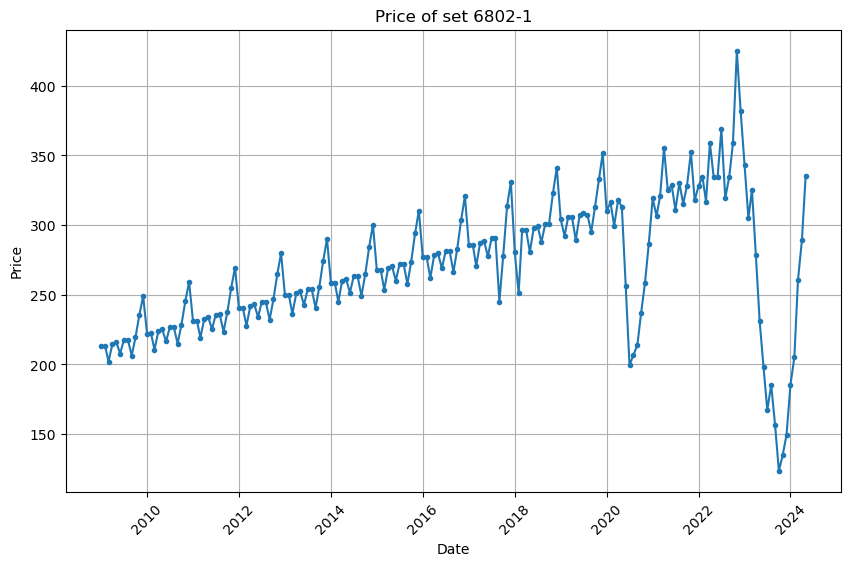

In [21]:
# Low Yearly Yield - High Yearly Risk
set_no = "6802-1"
plt.figure(figsize=(10, 6))
plt.plot(cluster1_by_set_df.index, cluster1_by_set_df[set_no], marker='.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price of set {set_no}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [22]:
cluster2_df = labeled_sets_df[labeled_sets_df["Label"] == 2]
cluster2_by_set_df = pd.pivot_table(cluster2_df, index='Date', columns='Set_no', values='Midhinge')
cluster2_by_set_df

Set_no,10003-1,10006-1,10007-1,10008-1,10009-1,10010-1,10011-1,10012-1,10013-1,10015-1,...,9756-1,9783-1,9833-1,9876-1,9888-1,9889-1,9891-1,9911-1,9912-1,9937-1
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,47.035,29.070,6.845,23.440,6.825,7.750,7.020,10.435,34.110,67.020,...,16.080,31.675,28.530,17.680,8.170,30.420,37.455,16.945,38.855,10.710
2009-02-01,47.450,29.280,6.850,23.575,6.830,7.765,7.025,10.475,34.235,67.445,...,16.105,31.950,28.485,17.685,8.180,30.445,37.440,17.005,38.785,10.710
2009-03-01,45.235,27.880,6.485,22.420,6.465,7.360,6.655,9.945,32.500,64.180,...,15.465,30.680,26.910,16.735,7.740,28.825,35.410,16.140,36.755,10.130
2009-04-01,48.445,29.810,6.895,23.945,6.870,7.825,7.070,10.605,34.635,68.575,...,16.110,31.955,28.530,17.770,8.230,30.635,37.590,17.200,38.820,10.755
2009-05-01,49.070,30.155,6.930,24.190,6.905,7.875,7.110,10.695,34.920,69.315,...,16.100,31.685,28.625,17.860,8.280,30.805,37.750,17.345,38.940,10.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,139.835,78.585,10.530,57.180,9.850,13.495,9.130,22.070,84.775,107.555,...,16.485,35.615,30.995,20.615,16.365,38.315,38.635,25.420,40.185,13.635
2024-02-01,134.535,78.675,8.200,48.690,10.455,12.065,10.660,22.520,81.340,117.415,...,15.970,32.465,32.855,19.355,13.240,32.485,48.840,21.795,38.955,14.340
2024-03-01,140.855,76.315,8.955,50.875,10.500,12.895,11.145,21.330,83.795,124.650,...,16.490,31.120,32.960,21.140,13.300,35.860,40.480,24.535,42.535,16.775


In [23]:
cluster2_by_set_df.rolling(window=12).std().iloc[12:].mean().sort_values(ascending=True)

Set_no
7503-1     0.226547
5264-1     0.230563
5280-1     0.230784
5161-1     0.243330
5195-1     0.265800
            ...    
6045-1     9.384859
6740-1     9.607708
2668-1     9.609265
4753-1     9.764305
4532-1    10.158456
Length: 1826, dtype: float64

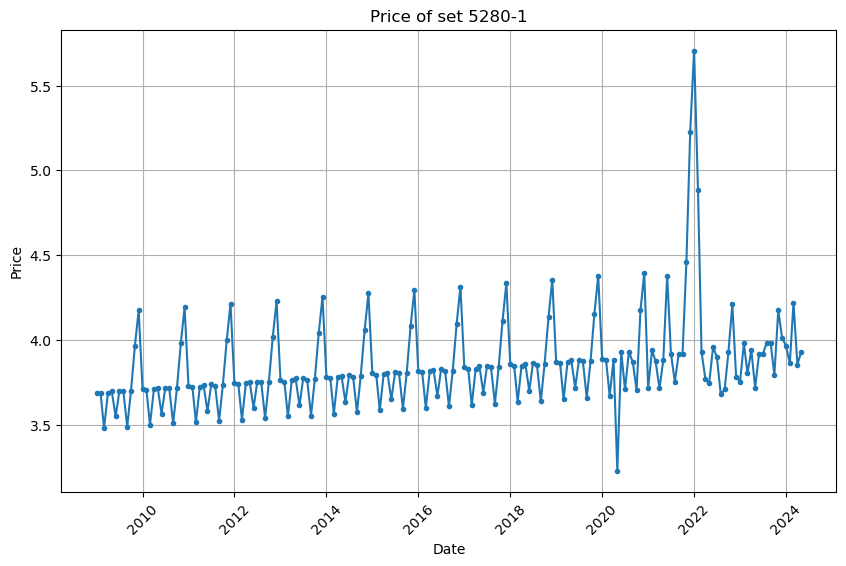

In [24]:
# Low Yearly Yield - Low Yearly Risk
set_no = "5280-1"
plt.figure(figsize=(10, 6))
plt.plot(cluster2_by_set_df.index, cluster2_by_set_df[set_no], marker='.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price of set {set_no}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [25]:
cluster3_df = labeled_sets_df[labeled_sets_df["Label"] == 3]
cluster3_by_set_df = pd.pivot_table(cluster3_df, index='Date', columns='Set_no', values='Midhinge')
cluster3_by_set_df

Set_no,10002-1,10022-1,10024-1,10039-1,10124-1,10131-1,1475-1,1476-1,1506-1,1596-1,...,8446-1,8448-1,8455-1,8466-1,8483-1,8538-1,8715-1,8734-1,8755-1,8854-1
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,219.915,214.580,192.280,210.080,162.640,131.325,174.840,309.500,553.055,117.355,...,119.970,532.590,222.310,230.410,192.565,97.620,48.470,42.190,188.675,244.515
2009-02-01,221.710,216.760,193.940,212.120,164.090,132.375,175.255,310.270,553.855,117.725,...,120.245,535.210,223.945,231.200,192.410,97.695,49.255,43.220,193.705,244.805
2009-03-01,211.280,206.925,184.890,202.415,156.475,126.130,166.160,294.190,524.665,111.695,...,113.995,508.585,213.255,219.410,181.910,92.495,47.265,41.765,187.545,231.850
2009-04-01,226.125,221.895,197.975,216.965,167.595,134.980,176.850,313.155,557.905,118.975,...,121.320,542.650,228.070,233.765,193.010,98.290,50.970,45.370,204.155,246.475
2009-05-01,228.925,225.040,200.505,219.960,169.790,136.630,178.090,315.380,561.315,119.895,...,122.155,547.750,230.725,235.630,193.780,98.830,51.965,46.585,209.970,247.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,646.995,559.615,560.775,859.780,542.045,433.590,323.470,577.990,425.410,233.425,...,300.165,498.570,511.795,661.650,353.560,344.000,457.325,400.640,224.005,619.740
2024-02-01,686.750,479.205,505.750,765.955,463.345,482.525,323.530,555.445,491.990,233.520,...,341.980,520.705,613.295,575.590,302.740,339.500,409.990,512.490,200.770,479.225
2024-03-01,552.505,469.770,576.725,721.905,577.620,416.855,342.870,580.935,555.060,221.025,...,276.010,620.645,517.490,569.800,374.580,368.010,308.635,498.415,167.880,523.290


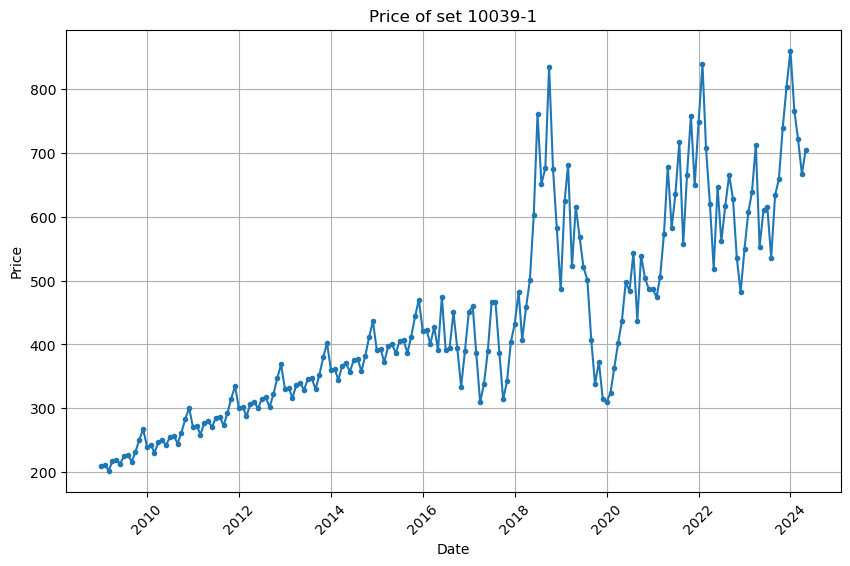

In [26]:
# High Yearly Yield - High Yearly Risk
set_no = "10039-1"
plt.figure(figsize=(10, 6))
plt.plot(cluster3_by_set_df.index, cluster3_by_set_df[set_no], marker='.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price of set {set_no}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()